In [40]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier



In [2]:
#read data
hr=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr.isnull().sum().sort_values(ascending = False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
newhr=hr.apply(LabelEncoder().fit_transform)


In [6]:
newhr['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
newhr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


In [8]:
#splitting data to input and output
X=newhr.drop('Attrition',axis=1) #input
y=newhr['Attrition']  #output(label)

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
X=scaler.fit_transform(X)    

In [10]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)  

In [11]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (1176, 34)
 y_train.shape :  (1176,)
 X_test.shape :  (294, 34)
 y_test.shape :  (294,)


In [12]:
#model1
#knn

In [13]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
KNeighborsClassifier(n_neighbors=11)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       1.00      0.08      0.14        39

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294

accuracy: 0.8775510204081632


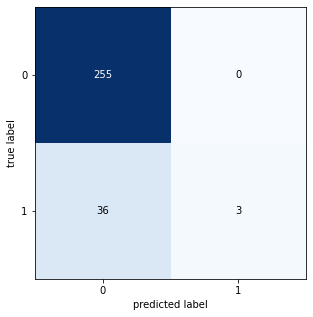

In [14]:
knn = KNeighborsClassifier(n_neighbors =11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print('accuracy:',knn.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
#model2
#decision tree with grid search

In [15]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=10, verbose=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
0.8443792553962046
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       max_features='auto')


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.36      0.13      0.19        39

    accuracy                           0.85       294
   macro avg       0.62      0.55      0.55       294
weighted avg       0.81      0.85      0.82       294

accuracy: 0.8537414965986394


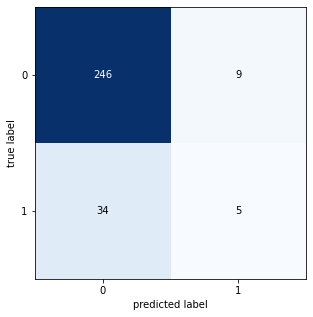

In [16]:
tree_clas =DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       max_features='auto')
tree_clas.fit(X_train, y_train)
y_predict = tree_clas.predict(X_test)
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('accuracy:',tree_clas.score(X_test, y_test))
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
#model 3
# random forest

In [17]:
#grid Search

rfc = RandomForestClassifier()
params = {'n_estimators': [3,10,30,100], 'criterion': ['gini', 'entropy'],'class_weight':[None, 'balanced', 'balanced_subsample']}
mysearch = GridSearchCV(rfc, params, cv=10,verbose=True)
mysearch.fit(X_train,y_train)
print(mysearch.best_estimator_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=30)


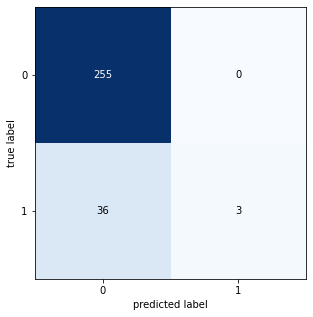

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       1.00      0.08      0.14        39

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294

accuracy: 0.8775510204081632


In [18]:
random_forest =RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=30)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()      
print(classification_report(y_test, y_predict))
print('accuracy:',random_forest.score(X_test, y_test))

In [ ]:
#model 4
#support vector machine

In [19]:
#Grid Search
svm_model =svm.SVC()
parameters = {'kernel':('linear', 'rbf'),'C':(1,2,5,10,11,15), 'gamma': (1, 0.1, 0.01)}
clf = GridSearchCV(svm_model, parameters, verbose=True,cv=5)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
SVC(C=5, gamma=0.01)


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.67      0.26      0.37        39

    accuracy                           0.88       294
   macro avg       0.78      0.62      0.65       294
weighted avg       0.87      0.88      0.86       294

accuracy: 0.8843537414965986


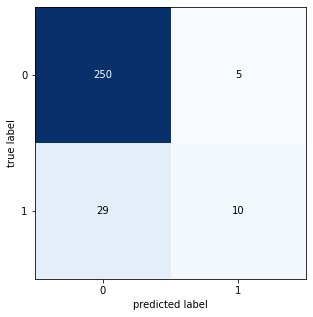

In [20]:
svm_model =svm.SVC(C=5, gamma=0.01)
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('accuracy:',svm_model.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show() 

In [ ]:
#model 5
#adaboost

In [21]:
ada_model= AdaBoostClassifier()
parameters = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30,40]}
clf = GridSearchCV(ada_model, parameters, cv=10, verbose=True)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_estimator_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
0.8750181080689556
AdaBoostClassifier(n_estimators=30)


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.59      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.74      0.61      0.64       294
weighted avg       0.85      0.88      0.86       294

accuarcy: 0.8775510204081632


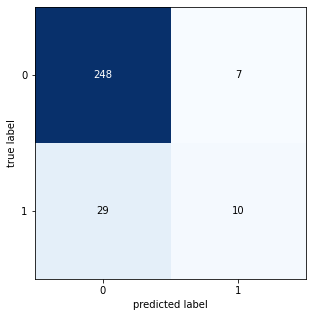

In [22]:
ada_model = AdaBoostClassifier(n_estimators=30)
ada_model.fit(X_train, y_train)
pred_ada_model= ada_model.predict(X_test)
print(classification_report(y_test, pred_ada_model))
print('accuarcy:',ada_model.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_ada_model)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show() 

In [67]:
#model 5
#logistic regression

In [23]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
# define grid search
grid = dict(solver=solvers,penalty=penalty)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, verbose=True)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_estimator_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8562928236566896
LogisticRegression(solver='newton-cg')


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.64      0.36      0.46        39

    accuracy                           0.89       294
   macro avg       0.77      0.66      0.70       294
weighted avg       0.87      0.89      0.87       294

accuracy: 0.8877551020408163


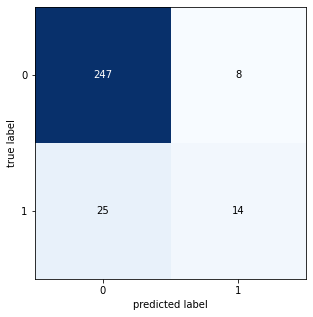

In [24]:
log_reg =LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
print(classification_report(y_test, y_predict))
print('accuracy:',log_reg.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()


In [ ]:
#model 6
#naive bias

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       255
           1       0.46      0.56      0.51        39

    accuracy                           0.85       294
   macro avg       0.69      0.73      0.71       294
weighted avg       0.87      0.85      0.86       294

accuracy: 0.8537414965986394


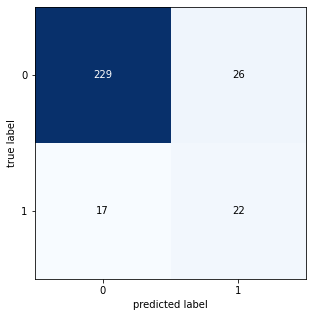

In [25]:
NB = GaussianNB()
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)
print(classification_report(y_test, pred_NB))
print('accuracy:',NB.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_NB)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [38]:
params={'n_estimators': [100,200,300,500],'learning_rate': [0.01,0.1,1],'max_depth':[3,4,5]}
gbm=GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbm, param_grid=params, n_jobs=-1, cv=5, verbose=True)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.8605409304002885
GradientBoostingClassifier(n_estimators=500)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294

accuracy: 0.891156462585034


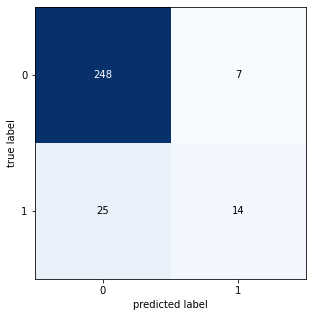

In [39]:
gboost = GradientBoostingClassifier(n_estimators=500)
gboost.fit(X_train, y_train)
pred_gboost = gboost.predict(X_test)
print(classification_report(y_test, pred_gboost))
print('accuracy:',gboost.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_gboost)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
#model 1 ==> KNN , accuracy=0.8775510204081632
#model2 ==> Decision Tree , accuracy=0.8537414965986394
#model 3 ==> Random Forest ,accuracy=0.8775510204081632
#model 4 ==> SVM , accuracy=0.8843537414965986
#model 5 ==> adaboost , accuracy=0.8775510204081632
#model 6 ==> Logistic regression , accuracy=0.8877551020408163
#model 7 ==>Naive Biase , accuracy=0.8537414965986394
#model 8 ==>Gradient boost, accuracy=0.891156462585034


#best model is  Random Forest with accuracy=0.9626865671641791